In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pickle
from time import perf_counter

# INF554 Assessment: Low Rank Approximation and Denoising of Images


In this assessment it is your task to use the PCA, MDS, SVD and NFM algorithms presented in Lecture 1 to obtain low rank approximations and denoise images.

**Please submit a zip file containing the following to moodle by the 17th October 14:00 (Paris time):**

- your filled out assessment jupyter notebook
- a pdf containing your short written answers to the 5 questions in this notebook.

Make sure to submit a couple of hours ahead of the deadline to ensure that technical difficulties do not cause you to miss the deadline. Late submissions will not be accepted.

Please note that this assessment is *to be completed individually. We will forward detected cases of plagarism to the university,* which in serious cases can have farreaching consequences for you. So, please make sure to submit your own, original solutions to this assessment. 

*Disclaimer:* You will not receive marks for importing the pca, nmf or mds functions from any library. In this assessment we ask you to code these methods from scratch in the hope that this will give you a better understanding of them.


## 1) Low Rank Approximation

We begin by briefly summarising how the four methods used in this lab can be used to obtain low rank approximations of our data. In this lab we will be working with images, where each pixel is encoded by four values, namely RGBA (red, green, blue, alpha). These four dimensions encoding each pixel will be referred to as the four channels of our images. You should create low rank approximations separately for each channel, i.e., to obtain a low rank approxiamtion for the images, you should separately calculate the low rank approximation for each channel of the input image and then concatinate these low rank approximations. Therefore, in this lab our data  will be denoted by $X_i \in R^{n\times m}$ for $i \in \{R,G,B,A\}.$



**PCA:** Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. Furthermore, let $U_k\in R^{m\times k}$ denote the right singular vectors of $C_i$ corresponding to the largest $k$ singular values. Then, the PCA low-rank approximation, denoted $\tilde{X}_i^{PCA},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{PCA} = C_i U_k U_k^T + M.
\end{equation}


**SVD:** Consider the singular value decomposition of $X_i = V \Sigma W^T.$ Further, let $V_k \in R^{n\times k},$ $W_k \in R^{m\times k}$ and $\Sigma_k \in R^{k\times k}$ contain the first $k$ left and right singular vectors and the largest $k$ singular values, respectivly. Then, the singular value low rank approximation, denoted $\tilde{X}_i^{SVD},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{SVD} = V_k \Sigma_k W_k^T.
\end{equation}


**NMF:** The non-negative matrix factorisation is iteratively calculated and directly produces a low rank approximation of $X_i$ into factors denoted by $A \in R^{n \times k}$ and $B\in R^{k \times m}.$ Hence,   
\begin{equation}
\tilde{X}_i^{NMF} = AB.
\end{equation}

**MDS:** 
Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. 
For the multidimensional scaling algorithm we utilise the singular value decomposition of the matrix denoted $C_i C_i^T.$ Let $Q_k \in R^{n\times k}$ denote the matrix containing the $k$ singular vectors corresponding to the $k$ largest singluar values of $C_i C_i^T.$ Then, the low rank approximation, denoted $\tilde{X}_i^{MDS},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{MDS} =  Q_k Q_k^T C_i +M_i.
\end{equation}

















We begin with a theoretical question.

>**Question 1: (4 Points)** The principal components produced in the PCA algorithm estimate $C_i U_{j}^\star,$ where $U_{j}^\star$ contains the $j^{\mathrm{th}}$ eigenvector of the *true* covariance matrix ($Var[C_i]$) of our data. Proof that the true principal components $C_i U_{j}^\star$ for $j \in \{1,\ldots, m\}$ are uncorrelated and relate their variance to the eigenvalues of the true covariance matrix. *Hint:* Consider $Var[C_i U_j^\star]$ to answer this question. 


Now we load the image you will be working with in this assessement.





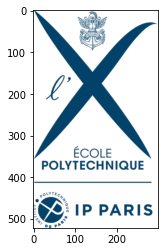

In [2]:
logo = mpimg.imread('IPPX_logo.png') 
plt.imshow(logo) 
plt.show()


>**Task 1: (8 Points)** Complete the below functions to calculate low rank approximations of an input image with 4 channels using the PCA, SVD, NMF and MDS algorithms. 

In [9]:
def pca(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
        U (np.array, dim: m,k,4): singular vectors used to obtain the low rank approximation
    """
    
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]
    
    n,m = X_R.shape #n rows, m columns
    M_R = np.ones((n,m))
    M_G = np.ones((n,m))
    M_B = np.ones((n,m))
    M_A = np.ones((n,m))
    
    for c in range(m):
        M_R[:,c] = M_R[:,c] * np.mean(X_R[:,c])
        M_G[:,c] = M_G[:,c] * np.mean(X_G[:,c])
        M_B[:,c] = M_B[:,c] * np.mean(X_B[:,c])
        M_A[:,c] = M_A[:,c] * np.mean(X_A[:,c])
    
    C_R = X_R - M_R
    C_G = X_G - M_G
    C_B = X_B - M_B
    C_A = X_A - M_A
    
    u_r, s_r, vh_r = np.linalg.svd(C_R, full_matrices=False)
    u_g, s_g, vh_g = np.linalg.svd(C_G, full_matrices=False)
    u_b, s_b, vh_b = np.linalg.svd(C_B, full_matrices=False)
    u_a, s_a, vh_a = np.linalg.svd(C_A, full_matrices=False)
    
    #we keep only the first k columns
    vh_r = vh_r.T #the numpy functiun gives with the transposed matrix 
    vh_r = vh_r[:,:k]   
    vh_g = vh_g.T
    vh_g = vh_g[:,:k]
    vh_b = vh_b.T
    vh_b = vh_b[:,:k]
    vh_a = vh_a.T
    vh_a = vh_a[:,:k]
    
    X_R_PCA = C_R @ vh_r @ vh_r.T + M_R
    X_G_PCA = C_G @ vh_g @ vh_g.T + M_G
    X_B_PCA = C_B @ vh_b @ vh_b.T + M_B
    X_A_PCA = C_A @ vh_a @ vh_a.T + M_A
    
    X_low_rank_approx = np.zeros((n,m,4))
    U = np.zeros((m,k,4))
    X_low_rank_approx[:,:,0] = X_R_PCA
    X_low_rank_approx[:,:,1] = X_G_PCA
    X_low_rank_approx[:,:,2] = X_B_PCA
    X_low_rank_approx[:,:,3] = X_A_PCA
    
    U[:,:,0] = vh_r
    U[:,:,1] = vh_g
    U[:,:,2] = vh_b
    U[:,:,3] = vh_a
    
    return X_low_rank_approx, U


def svd(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]

    n, m = X_R.shape
    
    u_r, s_r, vh_r = np.linalg.svd(X_R, full_matrices=False)
    u_g, s_g, vh_g = np.linalg.svd(X_G, full_matrices=False)
    u_b, s_b, vh_b = np.linalg.svd(X_B, full_matrices=False)
    u_a, s_a, vh_a = np.linalg.svd(X_A, full_matrices=False) 
    
    S_r, S_g, S_b, S_a = s_r[:k], s_g[:k], s_b[:k], s_a[:k] #we keep the first k greatest values
    U_r, U_g, U_b, U_a = u_r[:,:k], u_g[:,:k], u_b[:,:k], u_a[:,:k]
    vh_r, vh_g, vh_b, vh_a= vh_r.T, vh_g.T, vh_b.T, vh_a.T #to obtain the good matrix and not its transposed, given by the numpy function
    VH_r, VH_g, VH_b, VH_a = vh_r[:,:k], vh_g[:,:k], vh_b[:,:k], vh_a[:,:k]
    
    X_R_SVD = U_r @ np.diag(S_r) @ VH_r.T
    X_G_SVD = U_g @ np.diag(S_g) @ VH_g.T
    X_B_SVD = U_b @ np.diag(S_b) @ VH_b.T
    X_A_SVD = U_a @ np.diag(S_a) @ VH_a.T
    
    X_low_rank_approx = np.zeros((n,m,4))
    
    X_low_rank_approx[:,:,0] = X_R_SVD
    X_low_rank_approx[:,:,1] = X_G_SVD
    X_low_rank_approx[:,:,2] = X_B_SVD
    X_low_rank_approx[:,:,3] = X_A_SVD
     
    return X_low_rank_approx

def nmf(X, k, max_iter = 100, E = 10**(-4)):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #initialization 
    
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]
    
    n,m = X_R.shape
    A_R = (np.random.rand(n,k)+1)/2
    B_R = np.zeros((k,m))
    A_G = (np.random.rand(n,k)+1)/2
    B_G = np.zeros((k,m))
    A_B = (np.random.rand(n,k)+1)/2
    B_B = np.zeros((k,m))
    A_A = (np.random.rand(n,k)+1)/2
    B_A = np.zeros((k,m))
    
    iter_R = 0
    iter_G = 0
    iter_B = 0
    iter_A = 0
    #print(A_R.shape)
    #print(A_R)
    
    
    while iter_R<max_iter and np.linalg.norm(X_R - A_R @ B_R) > E:
        
        for c in range(m): 
            B_R[:,c] = np.linalg.inv(A_R.T @ A_R) @ A_R.T @ X_R[:,c]
        ## negativ terms equal to 0
        test_B_R = B_R>=0
        '''
        for i in range(k):
            for j in range(m):
                if not(test_B_R[i,j]):
                    B_R[i,j] = 0
        
        '''
        for c in range(n):
            A_R.T[:,c] = np.linalg.inv(B_R @ B_R.T) @ B_R @ X_R.T[:,c]
        ## negativ terms equal to 0
        '''
        test_A_R = A_R>=0
        
        for i in range(n):
            for j in range(k):
                if not(test_A_R[i,j]):
                    A_R[i,j] = 0
                    
        '''
        iter_R+=1
        
        
    while iter_G<max_iter and np.linalg.norm(X_G - A_G @ B_G) > E:
        
        for c in range(m): 
            B_G[:,c] = np.linalg.inv(A_G.T @ A_G) @ A_G.T @ X_G[:,c]
        ## negativ terms equal to 0
        '''
        test_B_G = B_G>=0
        for i in range(k):
            for j in range(m):
                if not(test_B_G[i,j]):
                    B_G[i,j] = 0
        '''
        
        for c in range(n):
            A_G.T[:,c] = np.linalg.inv(B_G @ B_G.T) @ B_G @ X_G.T[:,c]
        ## negativ terms equal to 0
        '''
        test_A_G = A_G>=0
        for i in range(n):
            for j in range(k):
                if not(test_A_G[i,j]):
                    A_G[i,j] = 0
            '''
        iter_G+=1
        
        
    while iter_B<max_iter and np.linalg.norm(X_B - A_B @ B_B) > E:
        
        for c in range(m): 
            B_B[:,c] = np.linalg.inv(A_B.T @ A_B) @ A_B.T @ X_B[:,c]
        ## negativ terms equal to 0
        '''
        test_B_B = B_B>=0
        for i in range(k):
            for j in range(m):
                if not(test_B_B[i,j]):
                    B_B[i,j] = 0
        '''
        
        for c in range(n):
            A_B.T[:,c] = np.linalg.inv(B_B @ B_B.T) @ B_B @ X_B.T[:,c]
        ## negativ terms equal to 0
        '''
        test_A_B = A_B>=0
        for i in range(n):
            for j in range(k):
                if not(test_A_B[i,j]):
                    A_B[i,j] = 0
                    ''' 
        iter_B+=1
        
        
    while iter_A<max_iter and np.linalg.norm(X_A - A_A @ B_A) > E:
        
        for c in range(m): 
            B_A[:,c] = np.linalg.inv(A_A.T @ A_A) @ A_A.T @ X_A[:,c]
        ## negativ terms equal to 0
        
        '''
        test_B_A = B_A>=0
        for i in range(k):
            for j in range(m):
                if not(test_B_A[i,j]):
                    B_A[i,j] = 0
        
        '''
        for c in range(n):
            A_A.T[:,c] = np.linalg.inv(B_A @ B_A.T) @ B_A @ X_A.T[:,c]
        ## negativ terms equal to 0
        '''
        test_A_A = A_A>=0
        for i in range(n):
            for j in range(k):
                if not(test_A_A[i,j]):
                   A_A[i,j] = 0
                   ''' 
        iter_A+=1
    ''' 
    test_B_R = B_R>=0
    for i in range(k):
            for j in range(m):
                if not(test_B_R[i,j]):
                    B_R[i,j] = 0
                    
    test_A_R = A_R>=0
        
    for i in range(n):
        for j in range(k):
            if not(test_A_R[i,j]):
                A_R[i,j] = 0
    
    test_B_G = B_G>=0
    for i in range(k):
        for j in range(m):
            if not(test_B_G[i,j]):
                B_G[i,j] = 0
    test_B_B = B_B>=0
    for i in range(k):
        for j in range(m):
            if not(test_B_B[i,j]):
                B_B[i,j] = 0 
    
    test_A_G = A_G>=0
    for i in range(n):
        for j in range(k):
            if not(test_A_G[i,j]):
                A_G[i,j] = 0
    
    test_A_B = A_B>=0
    for i in range(n):
        for j in range(k):
            if not(test_A_B[i,j]):
                A_B[i,j] = 0
    
    
    test_B_A = B_A>=0
    for i in range(k):
        for j in range(m):
            if not(test_B_A[i,j]):
                B_A[i,j] = 0
    
    
    test_A_A = A_A>=0
    for i in range(n):
        for j in range(k):
             if not(test_A_A[i,j]):
                A_A[i,j] = 0
    
    ''' 
    
    X_R_NMF = A_R @ B_R
    X_G_NMF = A_G @ B_G
    X_B_NMF = A_B @ B_B
    X_A_NMF = A_A @ B_A

    X_low_rank_approx = np.zeros((n,m,4))
    
    X_low_rank_approx[:,:,0] = X_R_NMF
    X_low_rank_approx[:,:,1] = X_G_NMF
    X_low_rank_approx[:,:,2] = X_B_NMF
    X_low_rank_approx[:,:,3] = X_A_NMF
    
    for i in range(4):
        
        X_low_rank_approx[:, :, i][X_low_rank_approx[:, :, i]<0] = 0
    
    return X_low_rank_approx



def mds(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]
    
    n,m = X_R.shape #n rows, m columns
    M_R = np.ones((n,m))
    M_G = np.ones((n,m))
    M_B = np.ones((n,m))
    M_A = np.ones((n,m))
    
    for c in range(m):
        M_R[:,c] = M_R[:,c] * np.mean(X_R[:,c])
        M_G[:,c] = M_G[:,c] * np.mean(X_G[:,c])
        M_B[:,c] = M_B[:,c] * np.mean(X_B[:,c])
        M_A[:,c] = M_A[:,c] * np.mean(X_A[:,c])
    
    C_R = X_R - M_R
    C_G = X_G - M_G
    C_B = X_B - M_B
    C_A = X_A - M_A
    
    C_R_MDS = C_R @ C_R.T
    C_G_MDS = C_G @ C_G.T
    C_B_MDS = C_B @ C_B.T
    C_A_MDS = C_A @ C_A.T
    
    Q_R = np.linalg.svd(C_R_MDS, full_matrices=False)[0]
    Q_G = np.linalg.svd(C_G_MDS, full_matrices=False)[0]
    Q_B = np.linalg.svd(C_B_MDS, full_matrices=False)[0]
    Q_A = np.linalg.svd(C_A_MDS, full_matrices=False)[0]
    
    #we keep only the first k colums, corresponding to the k greatest singular values 
    
    Q_R_k = Q_R[:,:k]
    Q_G_k = Q_G[:,:k]
    Q_B_k = Q_B[:,:k]
    Q_A_k = Q_A[:,:k]
    
    X_R_MDS = Q_R_k @ Q_R_k.T @ C_R + M_R
    X_G_MDS = Q_G_k @ Q_G_k.T @ C_G + M_G
    X_B_MDS = Q_B_k @ Q_B_k.T @ C_B + M_B
    X_A_MDS = Q_A_k @ Q_A_k.T @ C_A + M_A
    
    X_low_rank_approx = np.zeros((n,m,4))
    
    X_low_rank_approx[:,:,0] = X_R_MDS
    X_low_rank_approx[:,:,1] = X_G_MDS
    X_low_rank_approx[:,:,2] = X_B_MDS
    X_low_rank_approx[:,:,3] = X_A_MDS
    
    return X_low_rank_approx


>**Task 2: (1 Points)** Apply the functions implemented in Task 1 to produce low rank approximation images for $k$ equals 1, 5, 10, 30 and 60 of the logo and plot the results using the provided function.

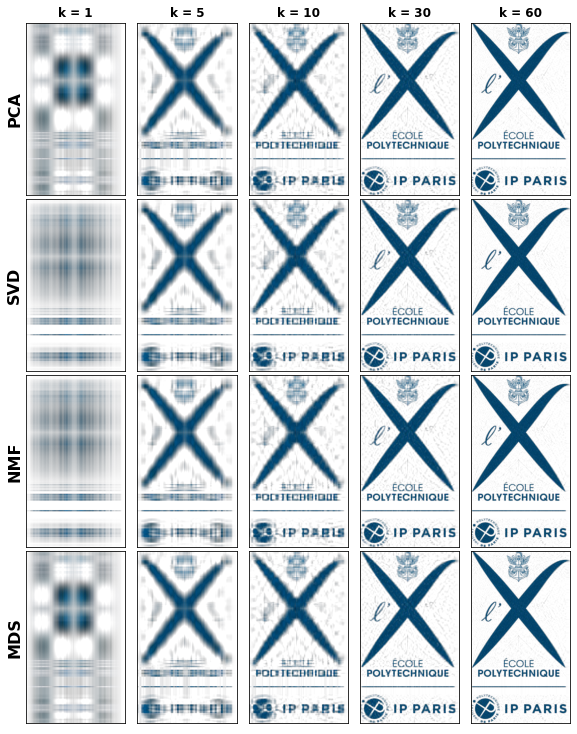

In [10]:

k_values = [1,5,10,30,60]
results_task2 = np.zeros(logo.shape + tuple([20]))

#PCA 
j=0
for k in k_values:
    results_task2[:,:,:,j] = pca(logo,k)[0]
    j= j+1
    
#SVD
for k in k_values:
    results_task2[:,:,:,j] = svd(logo,k)
    j= j+1

#NMF, for now
for k in k_values:
    results_task2[:,:,:,j] = nmf(logo,k)
    j= j+1

#MDS
for k in k_values:
    results_task2[:,:,:,j] = mds(logo,k)
    j= j+1 




fig, axs = plt.subplots(4,5, figsize=(8,10))


titles = ['k = 1','k = 5','k = 10','k = 30','k = 60']
methods = ['PCA', 'SVD', 'NMF', 'MDS']
for i in range(4):
    axs[i,0].set_ylabel(methods[i], fontsize=16,fontweight='bold')
    for j in range(5):
        if i==0:
            axs[i,j].set_title(titles[j], fontweight='bold')
        axs[i,j].imshow(np.clip(results_task2[:,:,:,i*5+j],0,1))
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
fig.tight_layout(pad=0)


>**Question 2: (2 Points)** Visually compare the low rank approximations and qualitatively assess (i) how the quality of the low rank approximatino varies as $k$ increases and (ii) which method produces the least lossy compression of the image. (No calculations or further processing are required here).

The quality of the PCA reconstruction is often evaluated by calculating the fraction of the total variance of the image that is preserved in the reconstructed image. Hence, the first evaluation metric we want to use to assess the quality of the reconstruction is the sum of the eigenvalues of the estimated covariance matrix $(\tilde{C}_i^{h})^T \tilde{C}_i^{h}/n$ for $h \in \{\text{PCA, SVD, NMF, MDS}\}$ divided by the sum of eigenvalues of the estimated covariance matrix of the original image $C_i^T C_i/m.$ The final metric is produced by averaging the fraction of the sum of eigenvalues over all four image channels.

The MDS algorithm minimises the *Stress* metric, which is calculated as follows,
\begin{equation}
    Stress = \sqrt{\dfrac{\sum_{a=1}^n \sum_{b=1}^n (d_{ab} - \delta_{ab})^2}{\sum_{a=1}^n \sum_{b=1}^n \delta_{ab}^2}},
\end{equation} 
where $d_{ab}$ the Euclidian distance between rows $a$ and $b$ of matrix $\tilde{X}_i^{h}$ for $h \in \{\text{PCA, SVD, NMF, MDS}\}$ and $\delta_{ab}$ contains the Euclidian distance between rows $a$ and $b$ of $X_i$. Again the final metric is produced by averaging the Stress metric over all four image channels.

The performance of the SVD and NMF reconstruction is commonly measured using the difference of the original image and the reconstructed image in Frobenius norm. This will be the third metric we will consider to compare our low rank approximations.

>**Task 3: (7 Points)** Fill out the code to calculate the three presented evaluation metrics of our methods. Then use these functions to quanititatively assess the approximation error of our four methods when $k=10.$ Fill your results into the provided table. 

In [12]:
def evals(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        eval_fraction (float): the ratio of the explained variance as described in the problem description
    """
    
    #Please insert the code for Task 3 here
    #we first compute C_i
    
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]
    
    X_R_approx = X_low_rank_approx[:,:,0]
    X_G_approx = X_low_rank_approx[:,:,1]
    X_B_approx = X_low_rank_approx[:,:,2]
    X_A_approx = X_low_rank_approx[:,:,3]
    
    n,m = X_R.shape #n rows, m columns
    M_R = np.ones((n,m))
    M_G = np.ones((n,m))
    M_B = np.ones((n,m))
    M_A = np.ones((n,m))
    
    M_R_approx = np.ones((n,m))
    M_G_approx = np.ones((n,m))
    M_B_approx = np.ones((n,m))
    M_A_approx = np.ones((n,m))
    
    for c in range(m):
        
        M_R[:,c] = M_R[:,c] * np.mean(X_R[:,c])
        M_G[:,c] = M_G[:,c] * np.mean(X_G[:,c])
        M_B[:,c] = M_B[:,c] * np.mean(X_B[:,c])
        M_A[:,c] = M_A[:,c] * np.mean(X_A[:,c])
        
        M_R_approx[:,c] = M_R_approx[:,c] * np.mean(X_R_approx[:,c])
        M_G_approx[:,c] = M_G_approx[:,c] * np.mean(X_G_approx[:,c])
        M_B_approx[:,c] = M_B_approx[:,c] * np.mean(X_B_approx[:,c])
        M_A_approx[:,c] = M_A_approx[:,c] * np.mean(X_A_approx[:,c])
    
    C_R = X_R - M_R
    C_G = X_G - M_G
    C_B = X_B - M_B
    C_A = X_A - M_A
    
    C_R_approx = X_R_approx - M_R_approx
    C_G_approx = X_G_approx - M_G_approx
    C_B_approx = X_B_approx - M_B_approx
    C_A_approx = X_A_approx - M_A_approx
    
    C_R_approx_dot = (C_R_approx.T @ C_R_approx)/n
    C_G_approx_dot = (C_G_approx.T @ C_G_approx)/n
    C_B_approx_dot = (C_B_approx.T @ C_B_approx)/n
    C_A_approx_dot = (C_A_approx.T @ C_A_approx)/n
    
    C_R_dot = (C_R.T @ C_R)/m
    C_G_dot = (C_G.T @ C_G)/m
    C_B_dot = (C_B.T @ C_B)/m
    C_A_dot = (C_A.T @ C_A)/m
    
    eigen_R_approx = sum(np.linalg.eig(C_R_approx_dot)[0])
    eigen_G_approx = sum(np.linalg.eig(C_G_approx_dot)[0])
    eigen_B_approx = sum(np.linalg.eig(C_B_approx_dot)[0])
    eigen_A_approx = sum(np.linalg.eig(C_A_approx_dot)[0])
    
    eigen_R = sum(np.linalg.eig(C_R_dot)[0])
    eigen_G = sum(np.linalg.eig(C_G_dot)[0])
    eigen_B = sum(np.linalg.eig(C_B_dot)[0])
    eigen_A = sum(np.linalg.eig(C_A_dot)[0])
    
    fraction = np.array([eigen_R_approx/eigen_R, eigen_G_approx/eigen_G, eigen_B_approx/eigen_B, eigen_A_approx/eigen_A])
    
    eval_fraction = np.mean(fraction)
    
    return eval_fraction

def stress(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        stress (float): the stress metric value
    """
    
    #Please insert the code for Task 3 here
    #version with a lot of computing
    
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]
    
    X_R_approx = X_low_rank_approx[:,:,0]
    X_G_approx = X_low_rank_approx[:,:,1]
    X_B_approx = X_low_rank_approx[:,:,2]
    X_A_approx = X_low_rank_approx[:,:,3]
    
    n,m = X_R.shape #n rows, m columns
    
    S_up_R = 0 
    S_down_R = 0
    S_up_G = 0 
    S_down_G = 0
    S_up_B = 0 
    S_down_B = 0
    S_up_A = 0 
    S_down_A = 0
    
    d_approx_R = 0
    d_R = 0
    d_approx_G = 0
    d_G = 0
    d_approx_B = 0
    d_B = 0
    d_approx_A = 0
    d_A = 0
    
    for a in range(n):
        for b in range(m):
            
            d_R = np.linalg.norm(X_R[a,:] - X_R[b,:])
            d_approx_R = np.linalg.norm(X_R_approx[a,:] - X_R_approx[b,:])            
            S_up_R += (d_approx_R - d_R)**2
            S_down_R += d_R**2
            
            d_G = np.linalg.norm(X_G[a,:] - X_G[b,:])
            d_approx_G = np.linalg.norm(X_G_approx[a,:] - X_G_approx[b,:])        
            S_up_G += (d_approx_G - d_G)**2
            S_down_G += d_G**2
            
            d_B = np.linalg.norm(X_B[a,:] - X_B[b,:])
            d_approx_B = np.linalg.norm(X_B_approx[a,:] - X_B_approx[b,:])         
            S_up_B += (d_approx_B - d_B)**2
            S_down_B += d_B**2
            
            d_A = np.linalg.norm(X_A[a,:] - X_A[b,:])
            d_approx_A = np.linalg.norm(X_A_approx[a,:] - X_A_approx[b,:])         
            S_up_A += (d_approx_A - d_A)**2
            S_down_A += d_A**2
            
    stress_R = np.sqrt(S_up_R/S_down_R)
    stress_G = np.sqrt(S_up_G/S_down_G)
    stress_B = np.sqrt(S_up_B/S_down_B)
    stress_A = np.sqrt(S_up_A/S_down_A)
            
    stress = (stress_R + stress_G + stress_B + stress_A) / 4
    return stress


def Fnorm_difference(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        diff (float): the difference of the two inputs in Frobenius norm
    """
        
    diff = np.linalg.norm(X-X_low_rank_approx)
    
    """
    X_R = X[:,:,0]
    X_G = X[:,:,1]
    X_B = X[:,:,2]
    X_A = X[:,:,3]
    
    X_R_approx = X_low_rank_approx[:,:,0]
    X_G_approx = X_low_rank_approx[:,:,1]
    X_B_approx = X_low_rank_approx[:,:,2]
    X_A_approx = X_low_rank_approx[:,:,3]
    
    diff_R = np.linalg.norm(X_R - X_R_approx)
    diff_G = np.linalg.norm(X_G - X_G_approx)
    diff_B = np.linalg.norm(X_B - X_B_approx)
    diff_A = np.linalg.norm(X_A - X_A_approx)
    
    diff = (diff_R + diff_G + diff_B + diff_A)/4
    """
    
    
    return diff




results_task3 = np.zeros(shape=[4,3])

#Please insert the code for Task 3 here to fill the results matrix

results_task3[0,0] = evals(logo,pca(logo,10)[0])
results_task3[0,1] = stress(logo,pca(logo,10)[0])
results_task3[0,2] = Fnorm_difference(logo,pca(logo,10)[0])

results_task3[1,0] = evals(logo,svd(logo,10))
results_task3[1,1] = stress(logo,svd(logo,10))
results_task3[1,2] = Fnorm_difference(logo,svd(logo,10))

results_task3[2,0] = evals(logo,nmf(logo,10))
results_task3[2,1] = stress(logo,nmf(logo,10))
results_task3[2,2] = Fnorm_difference(logo,nmf(logo,10))

results_task3[3,0] = evals(logo,mds(logo,10))
results_task3[3,1] = stress(logo,mds(logo,10))
results_task3[3,2] = Fnorm_difference(logo,mds(logo,10))

metrics = ['evals', 'stress', 'norm']
methods = ['PCA', 'SVD', 'NMF', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(4):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task3[i,j],4),'\t', end='')
    print('')


C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3637104393.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task3[0,0] = evals(logo,pca(logo,10)[0])
C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3637104393.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task3[1,0] = evals(logo,svd(logo,10))
C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3637104393.py:204: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task3[2,0] = evals(logo,nmf(logo,10))
C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3637104393.py:208: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task3[3,0] = evals(logo,mds(logo,10))


	evals	stress	norm	
PCA	0.4063 	0.1867 	79.4091 	
SVD	0.4058 	0.1874 	79.635 	
NMF	0.3752 	0.2194 	77.557 	
MDS	0.4063 	0.1867 	79.4091 	


## 2) Orthogonal Transformation of the Input Data

Now we will work with another image, which was obtained from the logo we have been working with so far, by applying a random orthogonal transformation to the pixel values. Hence, if $X_i$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the original image and  $X_i'$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the transformed image, then they are related as follows,
$$
X_i' = X_i Q \qquad ~ \qquad \forall i,
$$
where $Q$ is an orthogonal matrix which was randomly sampled.

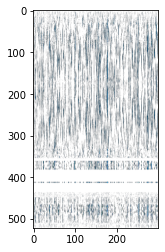

In [14]:
with open('transformed_image.pickle', 'rb') as f:
    transformed_image = pickle.load(f)
    
    
plt.imshow(np.clip(transformed_image,0,1))
plt.show()

>**Task 4: (2 Points)** Repeat task 3 on the transformed image. 




In [15]:
results_task4 = np.zeros(shape=[4,3])

#Please insert the code for Task 4 here to fill the results matrix

results_task4[0,0] = evals(logo,pca(transformed_image,10)[0])
results_task4[0,1] = stress(logo,pca(transformed_image,10)[0])
results_task4[0,2] = Fnorm_difference(transformed_image,pca(logo,10)[0])

results_task4[1,0] = evals(logo,svd(transformed_image,10))
results_task4[1,1] = stress(logo,svd(transformed_image,10))
results_task4[1,2] = Fnorm_difference(transformed_image,svd(logo,10))

results_task4[2,0] = evals(logo,nmf(transformed_image,10))
results_task4[2,1] = stress(logo,nmf(transformed_image,10))
results_task4[2,2] = Fnorm_difference(transformed_image,nmf(logo,10))

results_task4[3,0] = evals(logo,mds(transformed_image,10))
results_task4[3,1] = stress(logo,mds(transformed_image,10))
results_task4[3,2] = Fnorm_difference(transformed_image,mds(logo,10))


metrics = ['evals', 'stress', 'norm']
methods = ['PCA', 'SVD', 'NMF', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(4):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task4[i,j],4),'\t', end='')
    print('')
    

C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3141977491.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task4[0,0] = evals(logo,pca(transformed_image,10)[0])
C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3141977491.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task4[1,0] = evals(logo,svd(transformed_image,10))
C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3141977491.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task4[2,0] = evals(logo,nmf(transformed_image,10))
C:\Users\BENJAM~1\AppData\Local\Temp/ipykernel_64588/3141977491.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task4[3,0] = evals(logo,mds(transformed_image,10))


	evals	stress	norm	
PCA	0.4063 	0.1867 	278.8507 	
SVD	0.4058 	0.1874 	278.7889 	
NMF	0.1608 	0.4839 	278.3108 	
MDS	0.4063 	0.1867 	278.8507 	


>**Question 3: (4 Points)** Prove that the low rank approximations of $X_i$ and $X_i'$ obtained using the PCA algorithm capture equal amounts of the variance of the two images. Furthermore, proof that the principal components ($C_i U_{jk},$ and $C_i' U_{jk}'$ for $j\in \{1,\ldots, k\})$ are equal. (Note that in practice you might encounter principal components which are unequal since the obtained eigenvectors have opposing signs. This should not be a problem for you here since this question should be answered using a theoretical pen and paper proof.)  

## 3) Image Denoising

In this section we will use the eigenvectors used in the PCA of the original logo to denoise two noisy images of the logo. In the cell below we load the two noisy images.

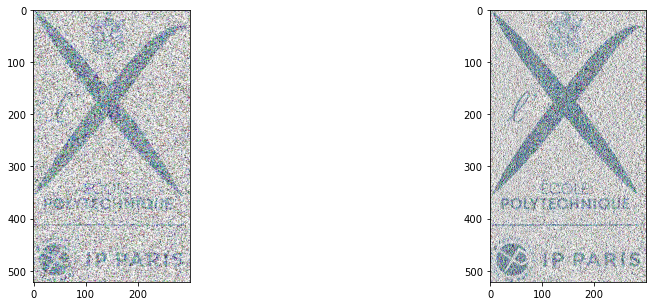

In [16]:
with open('noisy_image1.pickle', 'rb') as f:
    noisy_image1 = pickle.load(f)
    
with open('noisy_image2.pickle', 'rb') as f:
    noisy_image2 = pickle.load(f)
    
fig, axs = plt.subplots(1,2, figsize=(15,5))  
axs[0].imshow(np.clip(noisy_image1,0,1))
axs[1].imshow(np.clip(noisy_image2,0,1))
plt.show()

**Task 5: (6 Points)** Use the eigenvectors used in the PCA algorithm on the original image to obtain low rank approximations of the noisy images. Use the number of eigenvectors which minmises the distance of the denoised image and the original logo in the Frobenius norm metric introduced in Section 1). Make sure to enter the number of used eigenvectors in the plot titles.

NB : We have implemented a PCA method using the SVD and not the eigenvalues decomposition. Hence, we will use the right singular vectors instead of the eigenvectors in this question, to respect the statement of the exercise. 

In [17]:
#Please insert the code for Task 5 here

X1_R = noisy_image1[:,:,0]
X1_G = noisy_image1[:,:,1]
X1_B = noisy_image1[:,:,2]
X1_A = noisy_image1[:,:,3]

X2_R = noisy_image2[:,:,0]
X2_G = noisy_image2[:,:,1]
X2_B = noisy_image2[:,:,2]
X2_A = noisy_image2[:,:,3]

n,m = X1_R.shape 

M1_R = np.ones((n,m))
M1_G = np.ones((n,m))
M1_B = np.ones((n,m))
M1_A = np.ones((n,m))

M2_R = np.ones((n,m))
M2_G = np.ones((n,m))
M2_B = np.ones((n,m))
M2_A = np.ones((n,m))

for c in range(m):
    
    M1_R[:,c] = M1_R[:,c] * np.mean(X1_R[:,c])
    M1_G[:,c] = M1_G[:,c] * np.mean(X1_G[:,c])
    M1_B[:,c] = M1_B[:,c] * np.mean(X1_B[:,c])
    M1_A[:,c] = M1_A[:,c] * np.mean(X1_A[:,c])

    M2_R[:,c] = M2_R[:,c] * np.mean(X2_R[:,c])
    M2_G[:,c] = M2_G[:,c] * np.mean(X2_G[:,c])
    M2_B[:,c] = M2_B[:,c] * np.mean(X2_B[:,c])
    M2_A[:,c] = M2_A[:,c] * np.mean(X2_A[:,c])

C1_R = X1_R - M1_R
C1_G = X1_G - M1_G
C1_B = X1_B - M1_B
C1_A = X1_A - M1_A

C2_R = X2_R - M2_R
C2_G = X2_G - M2_G
C2_B = X2_B - M2_B
C2_A = X2_A - M2_A

X1_R_approx = np.zeros((n,m))
X1_G_approx = np.zeros((n,m))
X1_B_approx = np.zeros((n,m))
X1_A_approx = np.zeros((n,m))

X2_R_approx = np.zeros((n,m))
X2_G_approx = np.zeros((n,m))
X2_B_approx = np.zeros((n,m))
X2_A_approx = np.zeros((n,m))

norm_1 = 10000
norm_2 = 10000
k_f_1 = 1
k_f_2 = 1
result1 = np.zeros((n,m,4))
result2 = np.zeros((n,m,4))

for k in range(1,301):

    U = pca(logo,k)[1]

    X1_R = C1_R @ U[:,:,0] @ U[:,:,0].T + M1_R
    X1_G = C1_G @ U[:,:,1] @ U[:,:,1].T + M1_G
    X1_B = C1_B @ U[:,:,2] @ U[:,:,2].T + M1_B
    X1_A = C1_A @ U[:,:,3] @ U[:,:,3].T + M1_A

    X2_R = C2_R @ U[:,:,0] @ U[:,:,0].T + M2_R
    X2_G = C2_G @ U[:,:,1] @ U[:,:,1].T + M2_G
    X2_B = C2_B @ U[:,:,2] @ U[:,:,2].T + M2_B
    X2_A = C2_A @ U[:,:,3] @ U[:,:,3].T + M2_A

    X1_approx = np.zeros((n,m,4))
    X2_approx = np.zeros((n,m,4))

    X1_approx[:,:,0] = X1_R
    X1_approx[:,:,1] = X1_G
    X1_approx[:,:,2] = X1_B
    X1_approx[:,:,3] = X1_A

    X2_approx[:,:,0] = X2_R
    X2_approx[:,:,1] = X2_G
    X2_approx[:,:,2] = X2_B
    X2_approx[:,:,3] = X2_A

    norm_temp_1 = Fnorm_difference(logo,X1_approx)
    if (norm_temp_1 < norm_1) : 
        k_f_1 = k
        norm_1 = norm_temp_1
        result1 = X1_approx

    norm_temp_2 = Fnorm_difference(logo,X2_approx)
    if (norm_temp_2 < norm_2) : 
        k_f_2 = k
        norm_2 = norm_temp_2
        result2 = X2_approx
        
        




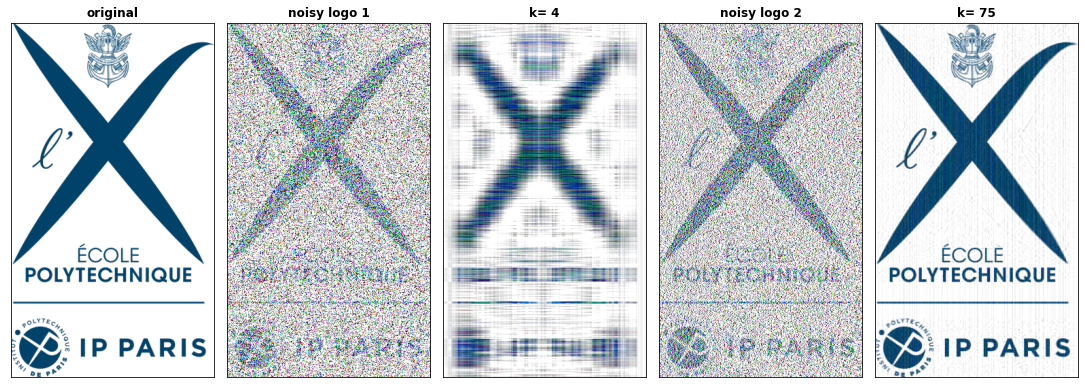

In [18]:
denoised_image1 = np.zeros(logo.shape)
denoised_image2 = np.zeros(logo.shape)



n,m,D = logo.shape
k1_optimal = k_f_1 #Please insert the code for Task 5 here
k2_optimal = k_f_2 #Please insert the code for Task 5 here

#Please insert the code for Task 5 here
denoised_image1 = result1
denoised_image2 = result2


fig, axs = plt.subplots(1,5, figsize=(15,5))    
axs[0].imshow(logo)
axs[1].imshow(np.clip(noisy_image1,0,1))
axs[2].imshow(np.clip(denoised_image1,0,1))
axs[3].imshow(np.clip(noisy_image2,0,1))
axs[4].imshow(np.clip(denoised_image2,0,1))



titles = ['original', 'noisy logo 1', 'k= %d'%(k1_optimal), 'noisy logo 2', 'k= %d'%(k2_optimal)]
for i in range(5):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(titles[i], fontweight='bold')
fig.tight_layout(pad=0)



**Question 4: (2 Points)** Comment on how the low rank approximation affects the level of noise in the images and explain the observed change in the level of noise visible in the low rank approximations. (We don't expect you to write more than 4 sentences in this answer.) 

**Question 5: (4 Points)** Are you able to draw conclusions about the structural properties of the noise added to the two images from your success in denoising them?